In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_wine
from sklearn.decomposition import LatentDirichletAllocation

# 1.	What are centroids in K-means clustering. Explain the role of centroids in K-means?

In K-means clustering, centroids are the central points of each cluster, representing the "average" location of all the points within that cluster. When K-means is applied, it begins by initializing
𝑘
k centroids, where
𝑘
k is the number of clusters specified by the user. These centroids are then iteratively adjusted based on the data points assigned to each cluster, gradually moving to better represent the actual center of each cluster as the algorithm progresses.

The role of centroids in K-means is crucial, as they are used to determine the boundaries of each cluster. During each iteration, every data point in the dataset is assigned to the nearest centroid based on a distance measure, typically Euclidean distance. Once all points are assigned, the centroids are recalculated by taking the mean of all points within each cluster. This process of assigning points to centroids and recalculating the centroids continues until the centroids stabilize and do not significantly change between iterations, or until a maximum number of iterations is reached.

# 2.	Load the data into the data frame. Check for null values in the data. Remove the rows which have null values. Evaluate statistics of the dataset. Drop the column sex. (

In [2]:
penguin = pd.read_csv('penguins.csv')

In [3]:
penguin.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
# Check for null values
print(penguin.isnull().sum())

# Remove rows with null values
penguin = penguin.dropna()

# Verify that null values have been removed
print(penguin.isnull().sum())

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [5]:
penguin = penguin.drop('sex', axis=1)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        335.000000       335.000000         335.000000   335.000000
mean          43.988358        17.169552         214.355224  4209.179104
std            5.453430         1.971966         263.253508   803.633495
min           32.100000        13.100000        -132.000000  2700.000000
25%           39.500000        15.600000         190.000000  3550.000000
50%           44.500000        17.300000         197.000000  4050.000000
75%           48.550000        18.700000         213.000000  4787.500000
max           59.600000        21.500000        5000.000000  6300.000000
<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 343
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3  

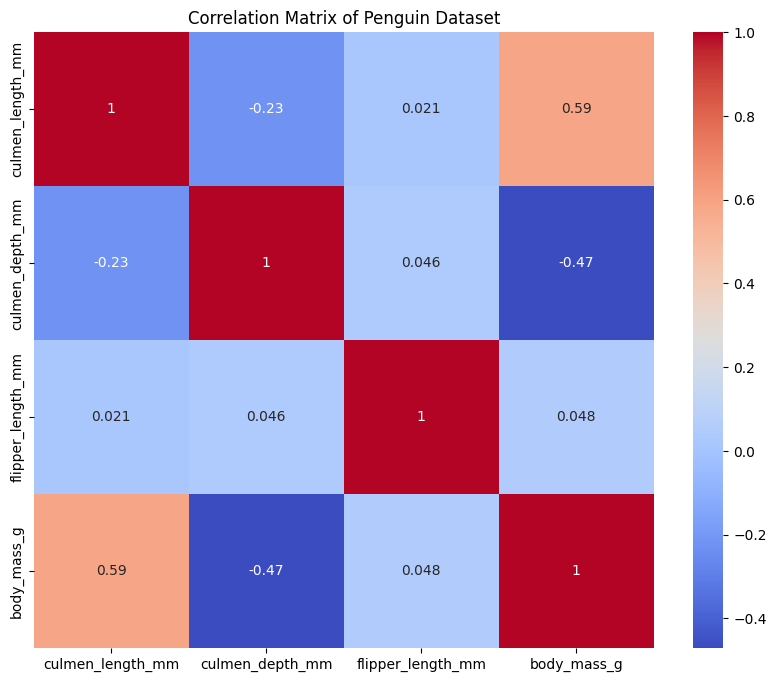

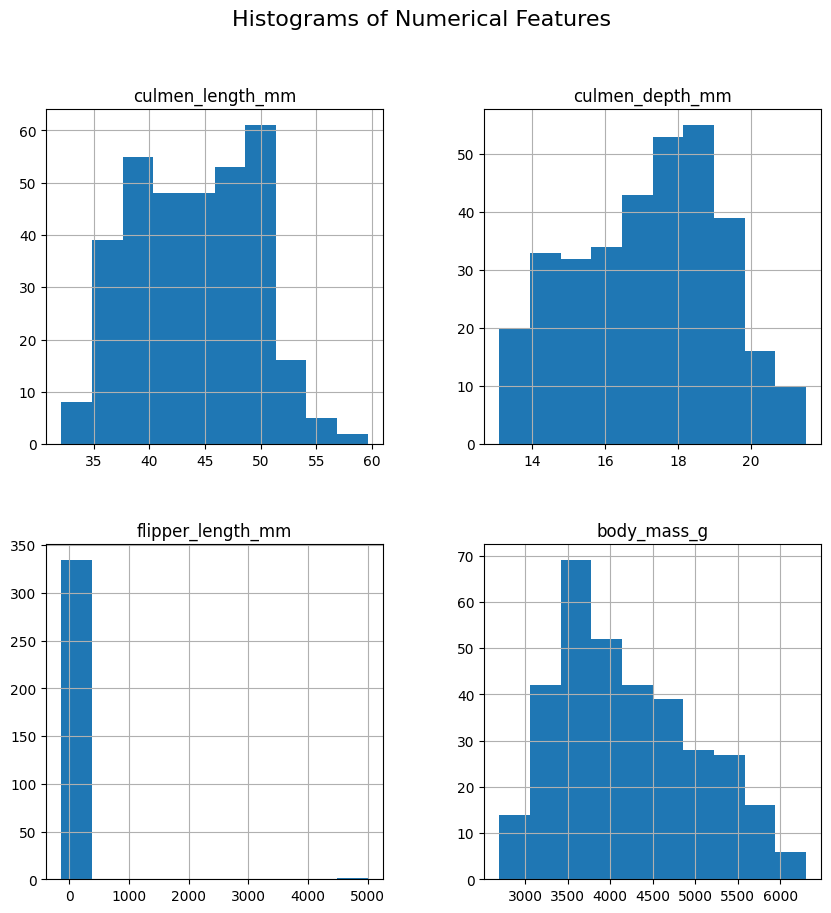

In [6]:
# Display basic statistics
print(penguin.describe())

# Display data types of each column
print(penguin.info())

# Correlation matrix
correlation_matrix = penguin.corr()
print(correlation_matrix)

# Visualization of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Penguin Dataset')
plt.show()

# Histograms for each numerical feature
penguin.hist(figsize=(10, 10))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()


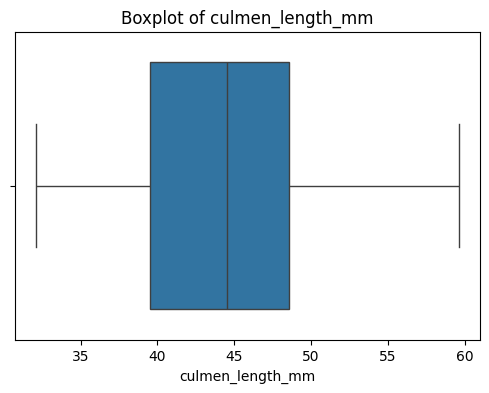

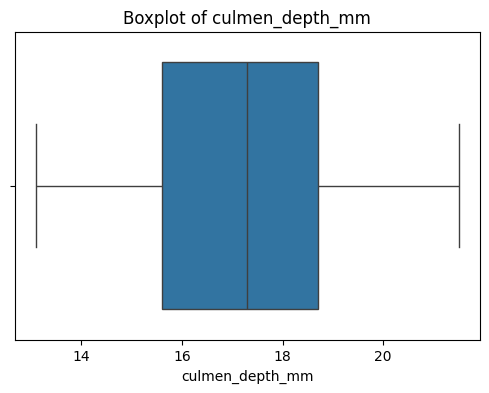

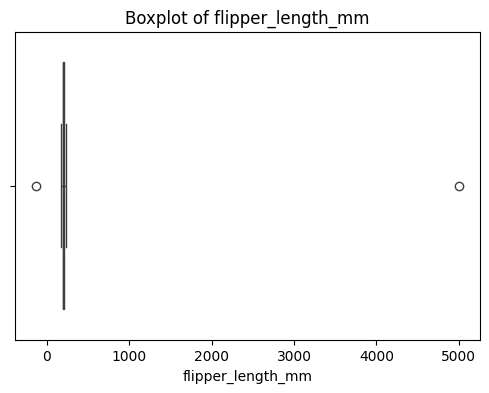

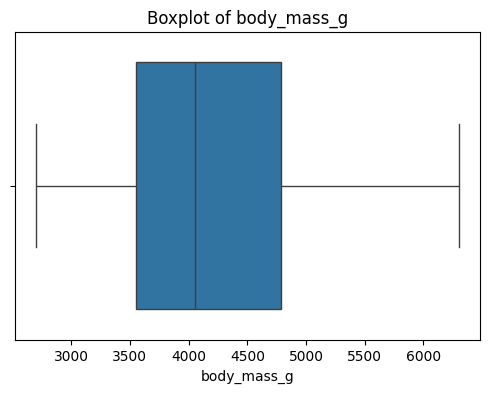

In [7]:
# Boxplots for each numerical feature
for column in penguin.select_dtypes(include=np.number):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=penguin[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

only flipper_length_mm has significant outliers.

In [8]:
Q1 = penguin['flipper_length_mm'].quantile(0.25)
Q3 = penguin['flipper_length_mm'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers = penguin[(penguin['flipper_length_mm'] < lower_bound) | (penguin['flipper_length_mm'] > upper_bound)]
num_outliers = len(outliers)

print(f"Number of outliers in 'flipper_length_mm': {num_outliers}")

Number of outliers in 'flipper_length_mm': 2


In [9]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = penguin[(penguin['flipper_length_mm'] < lower_bound) | (penguin['flipper_length_mm'] > upper_bound)]

print("Outliers in 'flipper_length_mm':")
outliers

Outliers in 'flipper_length_mm':


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
9,42.0,20.2,5000.0,4250.0
14,34.6,21.1,-132.0,4400.0


In [10]:
negative_flipper_length = penguin[penguin['flipper_length_mm'] < 0]
num_negative = len(negative_flipper_length)
print(f"Number of negative values in 'flipper_length_mm': {num_negative}")

Number of negative values in 'flipper_length_mm': 1


In [11]:
# Remove outliers from 'flipper_length_mm'
penguin = penguin[(penguin['flipper_length_mm'] >= lower_bound) & (penguin['flipper_length_mm'] <= upper_bound)]

# 4	Scale the data using min max scaler.

In [12]:
# Select numerical columns for scaling
numerical_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected numerical columns
penguin[numerical_cols] = scaler.fit_transform(penguin[numerical_cols])

# Display the scaled data
print(penguin.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0          0.254545         0.666667           0.152542     0.291667
1          0.269091         0.511905           0.237288     0.305556
2          0.298182         0.583333           0.389831     0.152778
4          0.167273         0.738095           0.355932     0.208333
5          0.261818         0.892857           0.305085     0.263889


<ipython-input-12-7969fceb5179>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguin[numerical_cols] = scaler.fit_transform(penguin[numerical_cols])


# 5.	Use PCA to reduce the data into three dimensions. Plot the clusters.  

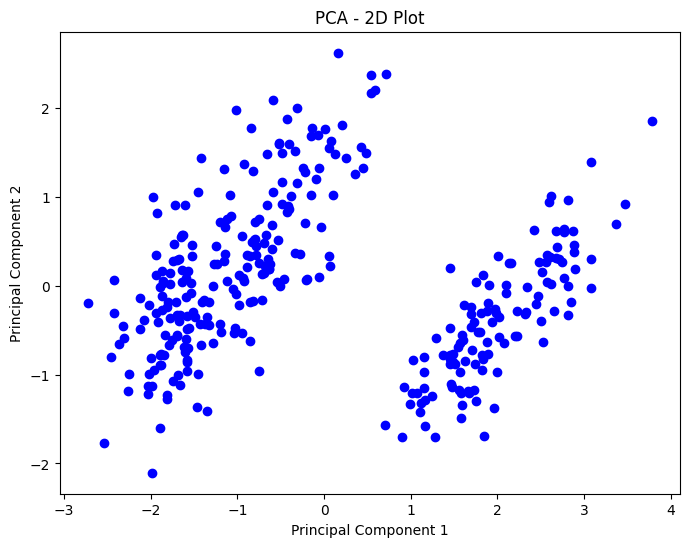

In [13]:
features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
x = penguin.loc[:, features].values

# Scale the features (important for PCA)
x = StandardScaler().fit_transform(x)

# Apply PCA with 3 components
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

# Plot the data in the reduced dimensional space
plt.figure(figsize=(8, 6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Plot')
plt.show()

In [14]:
# Apply K-means clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=0)  # Set random_state for reproducibility
penguin['cluster'] = kmeans.fit_predict(principalDf)


Silhouette Score: 0.45011315425408416


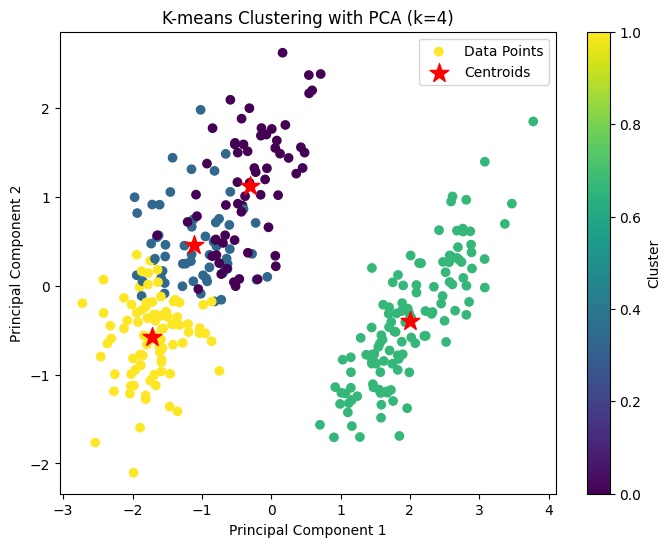

In [15]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(principalDf, penguin['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Plot the clusters with cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=penguin['cluster'], cmap='viridis', label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='*', label='Centroids') #Plot centroids
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA (k=4)')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

In this K-means clustering plot with
k=4 on PCA-transformed data, the clusters are well-separated in the 2D space, with each group having a distinct centroid marked by red stars. This suggests that the principal components have effectively reduced dimensionality while retaining important variance in the data. However, the silhouette score of 0.4501 indicates moderate clustering quality, meaning some overlap between clusters may still exist. Although the clusters are visually distinguishable, points near the boundaries may be less confidently assigned to a single cluster, impacting the overall clustering quality. Further tuning of k could help improve this separation.

#Question 2


# 1.	What is dimensionality reduction. How does dimensionality reduction prevent overfitting?

Dimensionality reduction reduces the number of features in a dataset while retaining essential information. It simplifies high-dimensional data, often using techniques like PCA, t-SNE, or UMAP. This reduction helps prevent overfitting by addressing the "curse of dimensionality," where models become overly complex and capture noise rather than meaningful patterns. With fewer dimensions, models focus on key information, improving generalization to new data. By filtering out redundant and irrelevant features, dimensionality reduction creates simpler, more interpretable models that perform better on unseen data, reducing the likelihood of overfitting and enhancing predictive accuracy.

# 2. •	Load the data into data frame. Apply standard scaler to the dataset.

In [16]:
# Load the wine dataset
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

In [17]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [18]:
# Apply MinMaxScaler to ensure non-negative values
scaler = MinMaxScaler()
wine_df_scaled = scaler.fit_transform(wine_df)
wine_df_scaled = pd.DataFrame(wine_df_scaled, columns = wine.feature_names)

# 3.Use LDA to reduce the dimensions to 2

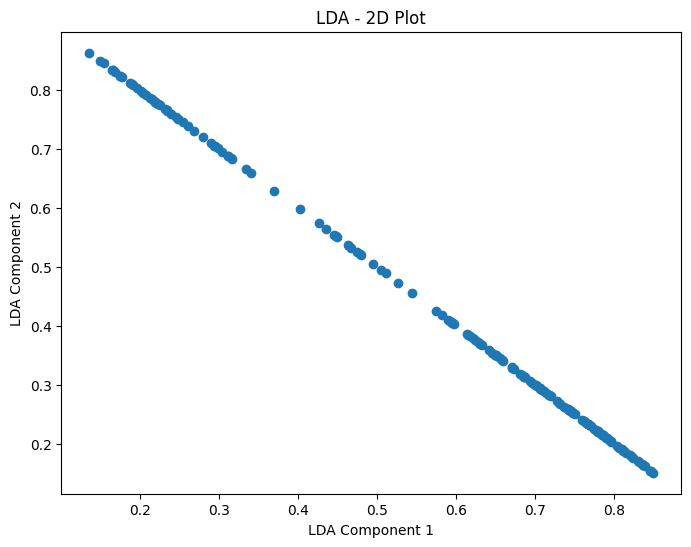

In [19]:
# Apply LDA with 2 components
lda = LatentDirichletAllocation(n_components=2, random_state=0)
lda_result = lda.fit_transform(wine_df_scaled)

# Create a new DataFrame with LDA components
lda_df = pd.DataFrame(data=lda_result, columns=['LDA Component 1', 'LDA Component 2'])

# Plotting the LDA components
plt.figure(figsize=(8, 6))
plt.scatter(lda_df['LDA Component 1'], lda_df['LDA Component 2'])
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA - 2D Plot')
plt.show()

This plot implies that there may not be significant separability between classes along multiple dimensions, or that the dataset's variance is largely explained by one dominant direction. If the classification goal is met with this projection, it shows that LDA has effectively reduced dimensionality while retaining discriminative information

# 4. Use Elbow method, to evaluate best value of clusters. Plot the graph for optimal clusters.

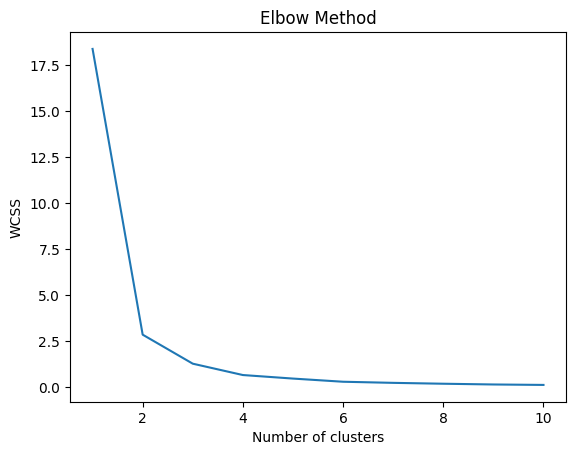

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(lda_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# 5. Train the model using the n_clusters obtained from the elbow method

In [21]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=0)
wine_df['cluster'] = kmeans.fit_predict(lda_df)

In [22]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(lda_df, wine_df['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6402448588674226


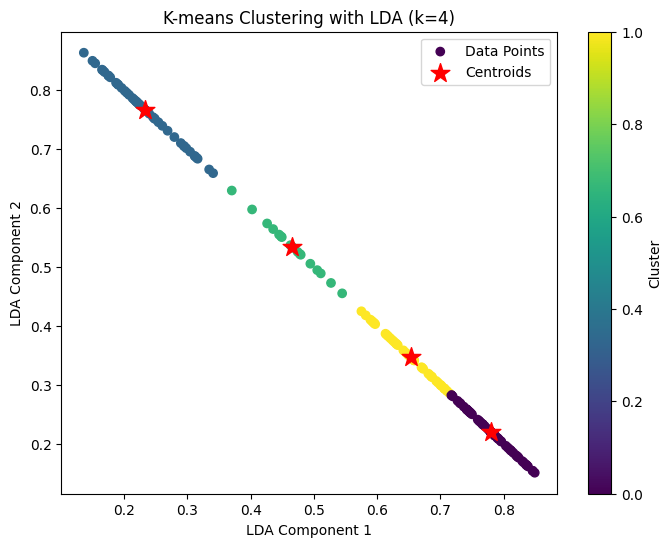

In [23]:
# Plot the clusters with cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(lda_df['LDA Component 1'], lda_df['LDA Component 2'], c=wine_df['cluster'], cmap='viridis', label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='*', label='Centroids') #Plot centroids
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('K-means Clustering with LDA (k=4)')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

In this K-means clustering plot with
k=4 on LDA-transformed data, the clusters align linearly along a diagonal, indicating that most variance is captured along a single dimension. The centroids, marked by red stars, are evenly spaced along this line, reflecting well-defined clusters. The silhouette score of 0.6402 suggests good clustering quality, meaning that points are closer to their cluster's centroid than to other clusters' centroids. This pattern highlights that the data is nearly one-dimensional in the LDA-reduced space, and K-means has effectively captured the main structure along this dominant linear trend.